# Pandas

In [1]:
#Import required libraries:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Session 1

#### •	Create and insert new records to the table with name of the table as employee details and insert 2 records in the table

In [2]:
employee = pd.read_csv("department_details.csv")
employee

,Dept_ID,Dept_name,Manager_id
0,1,HR,3
1,2,Admin,4
2,3,Account,6


In [3]:
#To add 2 new records:
employee.loc[3]=[4,'HR',4]
employee.loc[4]=[5,'Production',5]

#Print employee:
employee

,Dept_ID,Dept_name,Manager_id
0,1,HR,3
1,2,Admin,4
2,3,Account,6
3,4,HR,4
4,5,Production,5


#### •	Delete the first row where it matches particular condition from the table

In [4]:
employee.drop(employee[employee['Dept_ID']==1].index, inplace=True)

In [5]:
employee

,Dept_ID,Dept_name,Manager_id
1,2,Admin,4
2,3,Account,6
3,4,HR,4
4,5,Production,5


#### •	Update the existing record with the new value

In [6]:
employee.loc[1,['Dept_ID','Dept_name','Manager_id']] = [6,'HR',7]
employee

,Dept_ID,Dept_name,Manager_id
1,6,HR,7
2,3,Account,6
3,4,HR,4
4,5,Production,5


#### •	"Keep only last name of the players in the dataframe for below dataframe 
 

In [7]:
players= pd.DataFrame([['M.S.Dhoni', 36, 75, 5428000], 
['A.B.DVillers', 38, 74, 3428000],
 ['V.Kholi', 31, 70, 8428000],
 ['S.Smith', 34, 80, 4428000], 
 ['C.Gayle', 40, 100, 4528000],
 ['J.Root', 33, 72, 7028000], 
 ['K.Peterson', 42, 85, 2528000]], columns=['Name', 'Age', 'Weight', 'Salary'])
players

,Name,Age,Weight,Salary
0,M.S.Dhoni,36,75,5428000
1,A.B.DVillers,38,74,3428000
2,V.Kholi,31,70,8428000
3,S.Smith,34,80,4428000
4,C.Gayle,40,100,4528000
5,J.Root,33,72,7028000
6,K.Peterson,42,85,2528000


In [8]:
players['Last_name']=players.Name.str.split(".").str[-1]
players

,Name,Age,Weight,Salary,Last_name
0,M.S.Dhoni,36,75,5428000,Dhoni
1,A.B.DVillers,38,74,3428000,DVillers
2,V.Kholi,31,70,8428000,Kholi
3,S.Smith,34,80,4428000,Smith
4,C.Gayle,40,100,4528000,Gayle
5,J.Root,33,72,7028000,Root
6,K.Peterson,42,85,2528000,Peterson


#### •	Print dataframe with only first two columns in the input dataframe

In [9]:
players[['Name','Age']]

,Name,Age
0,M.S.Dhoni,36
1,A.B.DVillers,38
2,V.Kholi,31
3,S.Smith,34
4,C.Gayle,40
5,J.Root,33
6,K.Peterson,42


In [10]:
players.iloc[:,0:2]

,Name,Age
0,M.S.Dhoni,36
1,A.B.DVillers,38
2,V.Kholi,31
3,S.Smith,34
4,C.Gayle,40
5,J.Root,33
6,K.Peterson,42


#### •	Increase the salary of players with 35% of existing salary whose age is more than 40 and weight less than 80

In [11]:
lst  = players[(players['Age']>40) & (players['Weight']<80)]
lst

#Their is no such player having age more than 40 and weight less than 80

,Name,Age,Weight,Salary,Last_name


#### •	Increase the salary of players with average of all the existing players salary whose age is less than 40 and weight less than 80

In [12]:
lst  = players[(players['Age']<40) & (players['Weight']<80)]
avg = lst['Salary'].mean()
avg

6078000.0

In [13]:
lst['Salary'] = lst['Salary']+avg
lst

,Name,Age,Weight,Salary,Last_name
0,M.S.Dhoni,36,75,11506000.0,Dhoni
1,A.B.DVillers,38,74,9506000.0,DVillers
2,V.Kholi,31,70,14506000.0,Kholi
5,J.Root,33,72,13106000.0,Root


#### •	Display the dataframe from the input file shared (input_file.csv) where date.utc column is in standard timestamp format

In [14]:
data = pd.read_csv('input_file.csv')
data.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,2,20.0,µg/m³
1,Paris,FR,20-06-2019 23:00:00+00:00,FR04014,2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,`2,24.9,µg/m³
4,Bengaluru,ID,2019-06-20 20:00:00+00:00,FR04014,2,21.4,µg/m³


#### •	Clean the parameter column from the input file shared and keep it in int type

In [15]:
data['parameter']

0       2
1       2
2       2
3      `2
4       2
5       2
6      \2
7       2
8     NaN
9     NaN
10      2
11     12
12     -2
13      5
14      9
15      2
16      2
17      2
Name: parameter, dtype: object

In [16]:
data['parameter'].replace(to_replace=["`2",np.nan,"-2"], value="2", inplace=True)
data.loc[6] = ['Paris', 'FR','2022-06-10 16:17:43.263981','FR04014',2,23.9, 'µg/m³']
data

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,2,20.0,µg/m³
1,Paris,FR,20-06-2019 23:00:00+00:00,FR04014,2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,2,24.9,µg/m³
4,Bengaluru,ID,2019-06-20 20:00:00+00:00,FR04014,2,21.4,µg/m³
5,Paris,FR,2019-07-20 19:00:00+00:00,FR04014,2,25.3,µg/m³
6,Paris,FR,2022-06-10 16:17:43.263981,FR04014,2,23.9,µg/m³
7,Bengaluru,ID,2019-06-20 17:00:00+00:00,FR04014,2,23.2,µg/m³
8,Paris,FR,2019-06-20 16:00:00+00:00,FR04014,2,19.0,µg/m³
9,Paris,FR,2019-06-20 15:00:00+00:00,FR04014,2,19.3,µg/m³


In [17]:
data['parameter']=data['parameter'].astype(dtype=int)
data.dtypes

city          object
country       object
date.utc      object
location      object
parameter      int32
value        float64
unit          object
dtype: object

#### •	Fill the null value in parameter column with average of all the non null parameters in dataframe

In [18]:
data['parameter'].fillna(data['parameter'].mean())

0      2
1      2
2      2
3      2
4      2
5      2
6      2
7      2
8      2
9      2
10     2
11    12
12     2
13     5
14     9
15     2
16     2
17     2
Name: parameter, dtype: int32

#### •	Fill the country based on the other values in the dataframe for city

In [19]:
data

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,2,20.0,µg/m³
1,Paris,FR,20-06-2019 23:00:00+00:00,FR04014,2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,2,24.9,µg/m³
4,Bengaluru,ID,2019-06-20 20:00:00+00:00,FR04014,2,21.4,µg/m³
5,Paris,FR,2019-07-20 19:00:00+00:00,FR04014,2,25.3,µg/m³
6,Paris,FR,2022-06-10 16:17:43.263981,FR04014,2,23.9,µg/m³
7,Bengaluru,ID,2019-06-20 17:00:00+00:00,FR04014,2,23.2,µg/m³
8,Paris,FR,2019-06-20 16:00:00+00:00,FR04014,2,19.0,µg/m³
9,Paris,FR,2019-06-20 15:00:00+00:00,FR04014,2,19.3,µg/m³


In [20]:
data['country'].replace(to_replace=np.nan, value='FR', inplace=True)
data

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,2,20.0,µg/m³
1,Paris,FR,20-06-2019 23:00:00+00:00,FR04014,2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,2,24.9,µg/m³
4,Bengaluru,ID,2019-06-20 20:00:00+00:00,FR04014,2,21.4,µg/m³
5,Paris,FR,2019-07-20 19:00:00+00:00,FR04014,2,25.3,µg/m³
6,Paris,FR,2022-06-10 16:17:43.263981,FR04014,2,23.9,µg/m³
7,Bengaluru,ID,2019-06-20 17:00:00+00:00,FR04014,2,23.2,µg/m³
8,Paris,FR,2019-06-20 16:00:00+00:00,FR04014,2,19.0,µg/m³
9,Paris,FR,2019-06-20 15:00:00+00:00,FR04014,2,19.3,µg/m³


#### •	Convert the date.utc to date.ist timestamp

In [21]:
import datetime
data['date.utc']=pd.datetime.now()
data.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2022-06-14 11:13:07.924686,FR04014,2,20.0,µg/m³
1,Paris,FR,2022-06-14 11:13:07.924686,FR04014,2,21.8,µg/m³
2,Paris,FR,2022-06-14 11:13:07.924686,FR04014,2,26.5,µg/m³
3,Paris,FR,2022-06-14 11:13:07.924686,FR04014,2,24.9,µg/m³
4,Bengaluru,ID,2022-06-14 11:13:07.924686,FR04014,2,21.4,µg/m³


#### •	What type of data is box-plots usually used for? Why?

1. Box plot is used to visualize the numeric data. 
2. It tells us about the Minimum, maximum, 25 percentile (Q1), 50 percentile (Q2) and 75 percentile (Q3) value.

#### •	When do you use a boxplot and in what situation would you choose boxplot over histograms. Explain with example?

Histograms are preferred to determine the underlying probability distribution of a data. Box plots on the other hand are more useful when comparing between several data sets. They are less detailed than histograms and take up less space

#### •	Plot the histogram to get the comparison of which city has more parameters with respect to date

city       date.utc                  
Bengaluru  2022-06-14 11:13:07.924686    AxesSubplot(0.125,0.125;0.775x0.755)
Paris      2022-06-14 11:13:07.924686    AxesSubplot(0.125,0.125;0.775x0.755)
Name: parameter, dtype: object

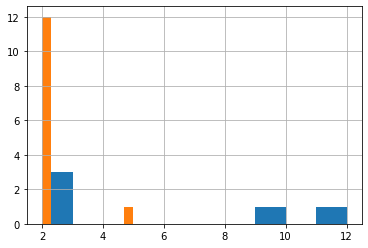

In [22]:
a = data.groupby(['city','date.utc'])['parameter']
a.hist()

# SECTION-2

#### 1.	Write a one liner apply function to remove all the spaces in the text column of a dataframe.
Slicing, Dicing, Pandas Manipulation:


In [23]:
weather = pd.read_csv('weather.csv')
weather.head()

,Data.Precipitation,Date.Full,Station.City,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,03-01-2016,Birmingham,Alabama,39,46,32,33,4.33
1,0.00,03-01-2016,Huntsville,Alabama,39,47,31,32,3.86
2,0.16,03-01-2016,Mobile7,Alabama,46,51,41,35,9.73
3,NaN,03-01-2016,Montg&omery,Alabama,45,52,38,32,6.86
4,0.01,03-01-2016,Anchorage,Alaska,34,38,29,19,7.80


In [24]:
weather['Station.City'] = weather['Station.City'].replace('Birmingham','B i r m i n g h a m')

In [25]:
weather['Station.City'] = weather['Station.City'].apply(lambda x: x.replace(" ",""))
weather.head()

,Data.Precipitation,Date.Full,Station.City,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,03-01-2016,Birmingham,Alabama,39,46,32,33,4.33
1,0.00,03-01-2016,Huntsville,Alabama,39,47,31,32,3.86
2,0.16,03-01-2016,Mobile7,Alabama,46,51,41,35,9.73
3,NaN,03-01-2016,Montg&omery,Alabama,45,52,38,32,6.86
4,0.01,03-01-2016,Anchorage,Alaska,34,38,29,19,7.80


#### 1.	Select the records that corresponds to hottest city for each state

In [26]:
a = weather.groupby(['Station.State','Station.City'])['Data.Temperature.Max Temp'].max().to_frame(name='Maximum').reset_index()
a

,Station.State,Station.City,Maximum
0,Alabama,Birmin@gham,64
1,Alabama,Birmingham,97
2,Alabama,Huntsville,97
3,Alabama,Mobile,94
4,Alabama,Mobile7,51
...,...,...,...
329,Wyoming,Cheyenne,89
330,Wyoming,Lander,93
331,Wyoming,Rawlins,89
332,Wyoming,Sheridan,96


In [27]:
a.sort_values(by = ['Station.State','Maximum'], ascending=[True,False])

,Station.State,Station.City,Maximum
6,Alabama,Montgomery,99
1,Alabama,Birmingham,97
2,Alabama,Huntsville,97
3,Alabama,Mobile,94
0,Alabama,Birmin@gham,64
...,...,...,...
330,Wyoming,Lander,93
329,Wyoming,Cheyenne,89
331,Wyoming,Rawlins,89
328,Wyoming,Che*yenne,45


In [28]:
a['Rank']=a['Station.State'].rank()
a

,Station.State,Station.City,Maximum,Rank
0,Alabama,Birmin@gham,64,4.0
1,Alabama,Birmingham,97,4.0
2,Alabama,Huntsville,97,4.0
3,Alabama,Mobile,94,4.0
4,Alabama,Mobile7,51,4.0
...,...,...,...,...
329,Wyoming,Cheyenne,89,331.0
330,Wyoming,Lander,93,331.0
331,Wyoming,Rawlins,89,331.0
332,Wyoming,Sheridan,96,331.0


#### 2.	Create a new dataframe which contains the average wind speed of each state and whose wind speed is greater than the overall average windspeed across all the states

In [29]:
weather['Data.Wind.Speed'].mean()

6.329594554248572

In [30]:
b = weather.groupby('Station.State')['Data.Wind.Speed'].mean().to_frame(name='Average_state').reset_index()
b['overall_avg_windspeed'] = 6.3295
b.head()

,Station.State,Average_state,overall_avg_windspeed
0,Alabama,4.817736,6.3295
1,Alaska,6.429959,6.3295
2,Arizona,4.662075,6.3295
3,Arkansas,3.298113,6.3295
4,California,4.893634,6.3295


In [31]:
c = b.where(b['Average_state']>6.3295)
df  = pd.DataFrame(c.dropna())
df

,Station.State,Average_state,overall_avg_windspeed
1,Alaska,6.429959,6.3295
6,Connecticut,6.474906,6.3295
7,DE,6.760377,6.3295
8,Delaware,6.760377,6.3295
11,Hawaii,8.971585,6.3295
13,Illinois,7.081761,6.3295
14,Indiana,6.836934,6.3295
15,Iowa,8.008679,6.3295
16,Kansas,8.249497,6.3295
21,Massachusetts,8.746993,6.3295


#### 3.	Pivot the existing dataframe to find the average temperature for every city across all the months for the year 2016. Please refer to the below table for the expected output.
City	Jan	Feb	March	April
Birmingham	 	 	 	 
Huntsville	 	 	 	 
Mobile	 	 	 	 
Montgomery	 	 	 	 
 
Note that the example above only mentioned till April but the output is expected to have all the months of 2016 and the blank cells should be filled with the respective average temperature.


In [32]:
weather['Date.Full']=pd.to_datetime(weather['Date.Full'])
weather['year'] = pd.DatetimeIndex(weather['Date.Full']).year
weather['month'] = pd.DatetimeIndex(weather['Date.Full']).month

In [33]:
year_2016 = weather[weather['year']==2016]
year_2016

,Data.Precipitation,Date.Full,Station.City,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed,year,month
0,0.00,2016-03-01,Birmingham,Alabama,39,46,32,33,4.33,2016,3
1,0.00,2016-03-01,Huntsville,Alabama,39,47,31,32,3.86,2016,3
2,0.16,2016-03-01,Mobile7,Alabama,46,51,41,35,9.73,2016,3
3,NaN,2016-03-01,Montg&omery,Alabama,45,52,38,32,6.86,2016,3
4,0.01,2016-03-01,Anchorage,Alaska,34,38,29,19,7.80,2016,3
...,...,...,...,...,...,...,...,...,...,...,...
16425,0.39,2016-12-25,Casper,Wyoming,27,37,16,24,15.61,2016,12
16426,0.04,2016-12-25,Che*yenne,Wyoming,34,45,23,24,10.85,2016,12
16427,0.33,2016-12-25,Lander,Wyoming,19,32,6,23,2.31,2016,12
16428,0.36,2016-12-25,Rawlins,Wyoming,27,37,17,23,13.72,2016,12


In [34]:
pd.pivot_table(year_2016, index=weather['Station.City'], values='Data.Temperature.Avg Temp', 
               columns='month', aggfunc='mean')

month,1,2,3,4,5,6,7,8,9,10,11,12
Station.City,,,,,,,,,,,,
Aberdeen,25.75,37.25,41.166667,51.00,59.75,57.75,63.6,67.25,57.333333,45.166667,36.8,30.000000
Abilene,50.50,59.00,59.166667,63.25,71.75,73.25,79.0,77.50,75.666667,68.166667,59.4,55.333333
Akron,34.75,37.25,46.666667,52.50,63.00,57.50,69.4,70.75,66.333333,51.000000,46.6,39.000000
Alamosa,18.50,38.75,35.666667,39.75,53.50,53.00,56.0,56.75,50.333333,44.833333,36.2,36.000000
Albany,32.50,34.50,47.000000,52.00,63.50,53.25,67.2,69.00,63.000000,47.500000,44.4,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester,30.75,32.00,42.500000,51.00,61.25,52.00,65.8,66.25,61.666667,46.666667,44.2,38.666667
Wrangell,60.00,60.00,60.000000,60.00,60.00,60.00,60.0,60.00,60.000000,60.000000,60.0,60.000000
Yakima,42.50,46.50,47.833333,53.75,64.75,56.25,66.4,72.25,60.000000,52.166667,44.6,37.666667


#### 4.	Bucket the daily average temperature into the following temperature scale: 0-25, 26-40, 41-65 and then find out the distribution of records that lie in each of these buckets. Also find which city’s temperature frequently falls in each bucket

In [35]:
weather['Temperature_bucket'] = [0-25 if x<=25 else 41-65 if x>=65 else 26-40 for x in weather['Data.Temperature.Avg Temp']]

In [36]:
import seaborn as sns

In [37]:
first = weather[weather['Temperature_bucket']==0-25]
second = weather[weather['Temperature_bucket']==26-40]
third = weather[weather['Temperature_bucket']==41-65]

# Data Preprocessing

#### 1.	Detect the nulls in the dataset if any. If the nulls are present in the numeric column then fill the null value using the following methods:
1.	Filling with median of the required column with the median of the variable of the respective state
2.	Filling with Linear Regression Method to find the best fit line by considering the rest of the columns as input to the model and predicting the null value.


# Pandas Manipulations & Any Data Pre-processing tasks which involves logic building.

#### 1.Using IPL Dataset find:
•	Top 10 run scorer
•	Batter with max six and fours
•	Max wickets in IPL
•	Team with max runs in powerplay
•	Most numbers of100’s and 50’s by a batsman
•	Ten Highest Individual score by Batsman
•	Highest strike rate(above 1000 runs)
•	Top 5 Batting Average
•	Top 5 bowling performance.
•	Best economy of bowler in IPL history
•	IPL Seasons won by Teams


In [38]:
player=pd.read_excel("Player.xlsx")
player.head()

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,0,NaN
1,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN
2,3,RT Ponting,1974-12-19,Right_Hand,Right-arm medium,Australia,0,NaN
3,4,DJ Hussey,1977-07-15,Right_Hand,Right-arm offbreak,Australia,0,NaN
4,5,Mohammad Hafeez,1980-10-17,Right_Hand,Right-arm offbreak,Pakistan,0,NaN


In [39]:
ball_by_ball = pd.read_excel('Ball_by_Ball.xlsx')
ball_by_ball

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,1,5,1,2,2,2,1,14,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136585,981024,9,2,20,2,2,11,369,6,434,299,2,,,,,
136586,981024,9,2,20,3,2,11,369,6,434,299,0,,,434,run out,183
136587,981024,9,2,20,4,2,11,140,9,369,299,0,legbyes,1,,,
136588,981024,9,2,20,5,2,11,369,6,140,299,1,,,,,


## • Top 10 run scorer

In [40]:
#Striker_id is same as player_id to merge the ball_by_ball with players we need to create a Player_Id common column in both the dataframes
ball_by_ball['Player_Id'] = ball_by_ball['Striker_Id']
ball_by_ball.head()

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id,Player_Id
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,,1
1,335987,1,1,1,2,1,2,2,2,1,14,0,,,,,,2
2,335987,1,1,1,3,1,2,2,2,1,14,0,wides,1,,,,2
3,335987,1,1,1,4,1,2,2,2,1,14,0,,,,,,2
4,335987,1,1,1,5,1,2,2,2,1,14,0,,,,,,2


In [41]:
df = pd.merge(player, ball_by_ball, on = 'Player_Id', how='right')
df.head()

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7,Match_Id,Season_Id,...,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,0,NaN,335987,1,...,1,1,2,14,0,legbyes,1,,,
1,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN,335987,1,...,2,2,1,14,0,,,,,
2,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN,335987,1,...,2,2,1,14,0,wides,1,,,
3,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN,335987,1,...,2,2,1,14,0,,,,,
4,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN,335987,1,...,2,2,1,14,0,,,,,


In [189]:
top_scorer = df.groupby(['Player_Id','Player_Name'])['Batsman_Scored'].sum().to_frame(name='Run_scored').reset_index()
top_10 = top_10_scorer.sort_values(by='Run_scored', ascending=False).head(10)
top_10

,Player_Id,Player_Name,Run_scored
20,21,SK Raina,4106
7,8,V Kohli,4105
56,57,RG Sharma,3874
39,40,G Gambhir,3634
161,162,CH Gayle,3447
45,46,RV Uthappa,3390
186,187,DA Warner,3373
109,110,AB de Villiers,3270
19,20,MS Dhoni,3270
41,42,S Dhawan,3082


## Batter with max six and fours 

In [43]:
data = df[['Player_Id','Player_Name','Batsman_Scored']]
data = df[df['Batsman_Scored'].isin([4,6])]
data

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7,Match_Id,Season_Id,...,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
8,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN,335987,1,...,2,2,1,15,4,,,,,
9,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN,335987,1,...,2,2,1,15,4,,,,,
10,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN,335987,1,...,2,2,1,15,6,,,,,
11,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN,335987,1,...,2,2,1,15,4,,,,,
16,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0,NaN,335987,1,...,2,2,1,14,4,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136558,32,SR Watson,1981-06-17,Right_Hand,Right-arm fast-medium,Australia,0,NaN,981024,9,...,32,5,354,163,6,,,,,
136570,255,STR Binny,1984-06-03,Right_Hand,Right-arm medium,India,0,NaN,981024,9,...,255,7,369,460,6,,,,,
136577,369,Sachin Baby,1988-12-18,Left_Hand,Right-arm offbreak,India,0,NaN,981024,9,...,369,6,255,299,4,,,,,
136583,369,Sachin Baby,1988-12-18,Left_Hand,Right-arm offbreak,India,0,NaN,981024,9,...,369,6,434,460,6,,,,,


In [44]:
max_boundaries = data.groupby('Player_Name')['Batsman_Scored'].count().to_frame(name='Max_boundaries').reset_index()
max_boundaries.sort_values(by = 'Max_boundaries', ascending=False)

,Player_Name,Max_boundaries
64,CH Gayle,533
292,SK Raina,521
336,V Kohli,508
254,RG Sharma,487
103,G Gambhir,473
...,...,...
276,S Nadeem,1
33,AN Ghosh,1
324,T Kohli,1
275,S Gopal,1


## Max wickets in IPL

In [45]:
bowlers = ball_by_ball[['Bowler_Id','Dissimal_Type']]
bowlers = bowlers[(bowlers.Dissimal_Type.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped','hit wicket']))]
bowlers = bowlers.groupby('Bowler_Id').count().reset_index()
bowlers.rename(columns={'Dissimal_Type':'no_wickets'}, inplace=True)
bowlers = bowlers.sort_values(by='no_wickets', ascending=False)
bowlers['Player_Id']=bowlers['Bowler_Id']


In [46]:
player_name = player[['Player_Id','Player_Name']]

In [47]:
no_of_wickets = pd.merge(bowlers,player_name, on='Player_Id', how='left').sort_values(by ='no_wickets' , ascending=False)
no_of_wickets[['Bowler_Id', 'Player_Name','no_wickets']]

,Bowler_Id,Player_Name,no_wickets
0,194,SL Malinga,120
1,50,Harbhajan Singh,107
2,67,PP Chawla,101
3,136,A Mishra,100
4,71,DJ Bravo,98
...,...,...,...
249,13,AA Noffke,1
248,448,SS Mundhe,1
247,324,KMDN Kulasekara,1
246,87,MK Tiwary,1


## Team with max runs in powerplay 

In [48]:
#To select all the required columns for analysis:-
max_runs = ball_by_ball[['Over_Id','Team_Batting_Id','Batsman_Scored','Extra_Runs']]

#To fetch the records for overs less than or equal to 6:-
max_runs = max_runs[max_runs['Over_Id']<=6]
max_runs


,Over_Id,Team_Batting_Id,Batsman_Scored,Extra_Runs
0,1,1,0,1
1,1,1,0,
2,1,1,0,1
3,1,1,0,
4,1,1,0,
...,...,...,...,...
136500,6,2,0,
136501,6,2,1,
136502,6,2,0,
136503,6,2,1,


In [49]:
#Column Extra runs is in object format to add Extra_runs and Batsman_Scored we have to change it firstly:
max_runs['Extra_Runs'].replace(" ", 0, inplace=True)
max_runs['Extra_Runs'].astype(int)

0         1
1         0
2         1
3         0
4         0
         ..
136500    0
136501    0
136502    0
136503    0
136504    0
Name: Extra_Runs, Length: 43265, dtype: int32

In [50]:
#We will add Batsman_Scored and Extra_Runs in order to get Total Runs scored
max_runs['Runs_scored']=max_runs['Batsman_Scored'] + max_runs['Extra_Runs']
data = max_runs[['Over_Id','Team_Batting_Id','Runs_scored']]

In [51]:
runs = data.groupby('Team_Batting_Id')['Runs_scored'].sum().to_frame(name='Total_runs').reset_index()
runs['Team_Id']=runs['Team_Batting_Id']
runs = runs[['Team_Id','Total_runs']]
runs

,Team_Id,Total_runs
0,1,5744
1,2,6028
2,3,6025
3,4,6101
4,5,4962
5,6,5854
6,7,6118
7,8,3374
8,9,680
9,10,1839


In [52]:
team = pd.read_excel('Team.xlsx')
team.head()

,Team_Id,Team_Name,Team_Short_Code
0,1,Kolkata Knight Riders,KKR
1,2,Royal Challengers Bangalore,RCB
2,3,Chennai Super Kings,CSK
3,4,Kings XI Punjab,KXIP
4,5,Rajasthan Royals,RR


In [53]:
top_runs = pd.merge(runs, team, on='Team_Id', how='inner')
top_runs = top_runs[['Team_Id','Team_Name','Total_runs']]
top_runs.sort_values(by='Total_runs', ascending=False)

,Team_Id,Team_Name,Total_runs
6,7,Mumbai Indians,6118
3,4,Kings XI Punjab,6101
1,2,Royal Challengers Bangalore,6028
2,3,Chennai Super Kings,6025
5,6,Delhi Daredevils,5854
0,1,Kolkata Knight Riders,5744
4,5,Rajasthan Royals,4962
7,8,Deccan Chargers,3374
10,11,Sunrisers Hyderabad,2802
9,10,Pune Warriors,1839


## •	Most numbers of100’s and 50’s by a batsman

In [54]:
ball_by_ball[['Match_Id','Striker_Id','Batsman_Scored']]

,Match_Id,Striker_Id,Batsman_Scored
0,335987,1,0
1,335987,2,0
2,335987,2,0
3,335987,2,0
4,335987,2,0
...,...,...,...
136585,981024,369,2
136586,981024,369,0
136587,981024,140,0
136588,981024,369,1


In [68]:
runs = ball_by_ball.groupby(['Match_Id','Striker_Id'])['Batsman_Scored'].sum().to_frame(name='Runs').reset_index()
new = runs[runs['Runs']>=50]

In [69]:
new = new.groupby('Striker_Id')['Runs'].count().to_frame(name='num_50_100').reset_index()
new['Player_Id']=new['Striker_Id']
new = new[['Player_Id','num_50_100']]
new

,Player_Id,num_50_100
0,1,7
1,2,13
2,4,5
3,6,11
4,7,1
...,...,...
124,413,1
125,420,1
126,421,1
127,427,1


In [75]:
most_50_100 = pd.merge(new, player, on='Player_Id', how = 'left')
most_50_100 = most_50_100[['Player_Id','Player_Name','num_50_100']]
most_50_100.sort_values(by='num_50_100', ascending=False)[0:10]

,Player_Id,Player_Name,num_50_100
74,187,DA Warner,34
22,40,G Gambhir,31
5,8,V Kohli,31
33,57,RG Sharma,30
13,21,SK Raina,29
66,162,CH Gayle,26
53,110,AB de Villiers,25
24,42,S Dhawan,25
41,85,AM Rahane,24
47,100,SE Marsh,19


## •	Ten Highest Individual score by Batsman

In [422]:
high_ind = ball_by_ball[['Match_Id','Striker_Id','Batsman_Scored']]
high_ind = high_ind.groupby(['Match_Id','Striker_Id'])['Batsman_Scored'].sum().to_frame(name='Run_scored').reset_index()
high_ind = high_ind.sort_values(by='Run_scored', ascending=False)
high_ind = high_ind[['Striker_Id','Run_scored']]
high_ind.rename(columns={'Striker_Id':'Player_Id'}, inplace=True)
high_ind

,Player_Id,Run_scored
5304,162,175
1,2,158
7532,110,133
8367,110,129
4692,162,128
...,...,...
1979,136,0
6963,57,0
1985,222,0
2003,185,0


In [424]:
playername = player[['Player_Id','Player_Name']]

In [429]:
top10_scorer = pd.merge(high_ind,playername, on='Player_Id',how='left')
top10_scorer[0:10]

,Player_Id,Run_scored,Player_Name
0,162,175,CH Gayle
1,2,158,BB McCullum
2,110,133,AB de Villiers
3,110,129,AB de Villiers
4,162,128,CH Gayle
5,185,127,M Vijay
6,41,122,V Sehwag
7,167,120,PC Valthaty
8,41,119,V Sehwag
9,162,117,CH Gayle


## •	Highest strike rate(above 1000 runs)

In [195]:
score_1000 = top_scorer[top_scorer['Run_scored']>=1000]
score_1000.head()

,Player_Id,Player_Name,Run_scored
0,1,SC Ganguly,1349
1,2,BB McCullum,2435
3,4,DJ Hussey,1322
5,6,R Dravid,2170
7,8,V Kohli,4105


In [201]:
balls_faced = ball_by_ball.groupby('Striker_Id')['Ball_Id'].count().to_frame(name='Balls_played').reset_index()
balls_faced['Player_Id']=balls_faced['Striker_Id']
balls_faced=balls_faced[['Player_Id','Balls_played']]
balls_faced.head()

,Player_Id,Balls_played
0,1,1326
1,2,1954
2,3,129
3,4,1101
4,5,84


In [207]:
strike = pd.merge(score_1000,balls_faced, on='Player_Id', how='left')
strike['Strike_rate'] = strike['Run_scored']/strike['Balls_played']*100 
strike.sort_values(by='Strike_rate', ascending=False)

,Player_Id,Player_Name,Run_scored,Balls_played,Strike_rate
19,41,V Sehwag,2728,1833,148.827059
35,110,AB de Villiers,3270,2231,146.571044
41,162,CH Gayle,3447,2360,146.059322
15,31,YK Pathan,2779,1953,142.293907
46,221,KA Pollard,1959,1380,141.956522
50,320,DA Miller,1480,1053,140.550807
44,187,DA Warner,3373,2440,138.237705
16,32,SR Watson,2553,1869,136.597111
9,20,MS Dhoni,3270,2419,135.179826
10,21,SK Raina,4106,3059,134.226872


## •	Top 5 bowling performance.

In [242]:
top5 = ball_by_ball[(ball_by_ball.Dissimal_Type.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped','hit wicket']))]
top5 = top5[['Bowler_Id','Match_Id','Dissimal_Type']]
top5 = top5.groupby(['Bowler_Id','Match_Id'])['Dissimal_Type'].count().to_frame(name='Wickets').reset_index()
top5 = top5.sort_values(by=['Bowler_Id','Wickets'], ascending=[True,False])
top5

,Bowler_Id,Match_Id,Wickets
0,1,335987,2
2,1,336019,2
4,1,392191,2
1,1,336015,1
3,1,336032,1
...,...,...,...
3145,462,980914,1
3148,463,980936,1
3149,463,980942,1
3150,463,980958,1


In [245]:
run = ball_by_ball[['Bowler_Id','Match_Id','Batsman_Scored']]
run = run.groupby(['Bowler_Id','Match_Id'])['Batsman_Scored'].sum().to_frame(name='runs').reset_index()
run = run.sort_values(by=['Bowler_Id','runs'], ascending=[True,False])
run

,Bowler_Id,Match_Id,runs
18,1,548353,39
16,1,548338,27
4,1,336019,25
6,1,336032,24
8,1,392191,24
...,...,...,...
6859,463,980942,21
6863,464,980970,31
6862,464,980962,22
6865,465,981010,25


In [251]:
top = pd.merge(top5,run, on=['Bowler_Id','Match_Id'], how = 'left')
top

,Bowler_Id,Match_Id,Wickets,runs
0,1,335987,2,20
1,1,336019,2,25
2,1,392191,2,24
3,1,336015,1,7
4,1,336032,1,24
...,...,...,...,...
3147,462,980914,1,32
3148,463,980936,1,36
3149,463,980942,1,21
3150,463,980958,1,39


## •	Best economy of bowler in IPL history

In [309]:
best = ball_by_ball.groupby(['Match_Id','Bowler_Id'])['Batsman_Scored'].sum().to_frame(name='Runs_spent').reset_index()
best.head()

,Match_Id,Bowler_Id,Runs_spent
0,335987,1,20
1,335987,9,47
2,335987,10,22
3,335987,13,35
4,335987,14,37


In [310]:
total_over = ball_by_ball.groupby(['Match_Id','Bowler_Id'])['Over_Id'].nunique().to_frame(name='Overs_done').reset_index()
total_over.head()

,Match_Id,Bowler_Id,Overs_done
0,335987,1,4
1,335987,9,4
2,335987,10,1
3,335987,13,4
4,335987,14,4


In [311]:
best_eco = pd.merge(best, total_over, on=['Match_Id','Bowler_Id'], how='left')
best_eco['Economy'] = best_eco['Runs_spent']/best_eco['Overs_done']
best_economy = best_eco.sort_values(by=['Bowler_Id','Economy'], ascending=[True,True])
best_economy

,Match_Id,Bowler_Id,Runs_spent,Overs_done,Economy
337,336015,1,7,3,2.333333
0,335987,1,20,4,5.000000
419,336022,1,23,4,5.750000
743,392191,1,24,4,6.000000
383,336019,1,25,4,6.250000
...,...,...,...,...,...
6496,980964,463,51,4,12.750000
6485,980962,464,22,3,7.333333
6535,980970,464,31,4,7.750000
6728,981002,465,13,2,6.500000


In [312]:
best_economy = best_economy.groupby('Bowler_Id')['Economy'].min().to_frame(name='Best_economy').reset_index()
best_economy.head()

,Bowler_Id,Best_economy
0,1,2.333333
1,4,2.000000
2,5,1.750000
3,8,1.000000
4,9,1.500000


In [313]:
best_economy.rename(columns = {'Bowler_Id':'Player_Id'}, inplace = True)
best_economy

,Player_Id,Best_economy
0,1,2.333333
1,4,2.000000
2,5,1.750000
3,8,1.000000
4,9,1.500000
...,...,...
326,461,9.500000
327,462,6.750000
328,463,5.250000
329,464,7.333333


In [314]:
player_name = player[['Player_Id','Player_Name']]
player_name

,Player_Id,Player_Name
0,1,SC Ganguly
1,2,BB McCullum
2,3,RT Ponting
3,4,DJ Hussey
4,5,Mohammad Hafeez
...,...,...
518,519,Subroto Das
519,520,K Srinivasan
520,521,VK Sharma
521,523,AV Wankhade


In [315]:
best_economy = pd.merge(best_economy,player_name, on='Player_Id', how='inner')
best_economy

,Player_Id,Best_economy,Player_Name
0,1,2.333333,SC Ganguly
1,4,2.000000,DJ Hussey
2,5,1.750000,Mohammad Hafeez
3,8,1.000000,V Kohli
4,9,1.500000,JH Kallis
...,...,...,...
326,461,9.500000,AF Milne
327,462,6.750000,Kuldeep Yadav
328,463,5.250000,T Shamsi
329,464,7.333333,SM Boland


## •	IPL Seasons won by Teams

In [321]:
season = pd.read_excel("season.xlsx")
season

,Season_Id,Season_Year,Orange_Cap_Id,Purple_Cap_Id,Man_of_the_Series_Id
0,1,2008,100,102,32
1,2,2009,18,61,53
2,3,2010,133,131,133
3,4,2011,162,194,162
4,5,2012,162,190,315
5,6,2013,19,71,32
6,7,2014,46,364,305
7,8,2015,187,71,334
8,9,2016,8,299,8


In [326]:
match = pd.read_excel("match.xlsx")
match.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,2008-04-19,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,2008-04-19,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,2008-04-20,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India


In [351]:
match_list = match[['Season_Id','Match_Winner_Id','Match_Date']]
match_list.head()

,Season_Id,Match_Winner_Id,Match_Date
0,1,1.0,2008-04-18
1,1,3.0,2008-04-19
2,1,6.0,2008-04-19
3,1,2.0,2008-04-20
4,1,1.0,2008-04-20


In [354]:
match_list.rename(columns = {'Match_Date':'Final_match_date'}, inplace=True)

In [356]:
final_match = match.groupby(['Season_Id'])['Match_Date'].max().to_frame(name='Final_match_date').reset_index()
final_match.head()

,Season_Id,Final_match_date
0,1,2008-06-01
1,2,2009-05-24
2,3,2010-04-25
3,4,2011-05-28
4,5,2012-05-27


In [370]:
winner_team = pd.merge(match_list,final_match, on=['Final_match_date','Season_Id'], how='inner')
winner_team['Team_Id']=winner_team['Match_Winner_Id']
winner_team

,Season_Id,Match_Winner_Id,Final_match_date,Team_Id
0,1,5.0,2008-06-01,5.0
1,2,8.0,2009-05-24,8.0
2,3,3.0,2010-04-25,3.0
3,4,3.0,2011-05-28,3.0
4,5,1.0,2012-05-27,1.0
5,6,7.0,2013-05-26,7.0
6,7,1.0,2014-06-01,1.0
7,8,7.0,2015-05-24,7.0
8,9,11.0,2016-05-29,11.0


In [371]:
team=pd.read_excel("team.xlsx")
team = team[['Team_Id', 'Team_Name']]

In [377]:
winner_seas = pd.merge(winner_team,team, on='Team_Id', how='inner')
winner_seas = winner_seas.sort_values(by='Season_Id', ascending=True)
winner_seas = winner_seas[['Season_Id','Team_Name']]
winner_seas

,Season_Id,Team_Name
0,1,Rajasthan Royals
1,2,Deccan Chargers
2,3,Chennai Super Kings
3,4,Chennai Super Kings
4,5,Kolkata Knight Riders
6,6,Mumbai Indians
5,7,Kolkata Knight Riders
7,8,Mumbai Indians
8,9,Sunrisers Hyderabad


# 2.Data Cleaning in “Sample DRP - PHI redacted (highlighted)”

In [392]:
sample_drp = pd.read_excel("Sample_DRP_PHI_redacted (highlighted).xlsx")
sample_drp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
0,NaN,NaN,Client Detail Sub Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,HUD APR Drilldown : Multiple Questions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [393]:
sample_drp.shape

(69, 140)

In [399]:
#To drop the columns:
thresh = len(sample_drp) * .2
sample_drp.dropna(thresh = thresh, axis = 1, inplace = True)

In [402]:
#To drop the rows:
thresh = len(sample_drp) * .2
sample_drp.dropna(thresh = thresh, axis = 0, inplace = True)

In [403]:
sample_drp

,Unnamed: 0,Unnamed: 4,Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 13,Unnamed: 15,Unnamed: 19,Unnamed: 20,Unnamed: 21,...,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 129,Unnamed: 130,Unnamed: 132,Unnamed: 135,Unnamed: 137,Unnamed: 138,Unnamed: 139
14,Client ID,Last Name,First Name,Relation To HoH,Family Size,Family Type,DOB,DOB Data Quality,Age\n(At Last Entry or Report Start),SSN,...,HIV Status\n(HUD Program - Entry),HIV Status\n(HUD Program - Latest),Domestic Violence\n(HUD Program - Entry),Leaver Stayer\n,Stay Length,Date Started On Streets,Length to Move In 3.917\n(Date Started on Stre...,Presenting as Chronically Homeless\n(Based off...,Chronically Homeless,Chronically Homeless Household
15,77497,Abell,Christopher,Self,1,Without Children,04/18/1969,Full DOB reported,52,XXX-XX-8723,...,No,No,No,Stayer,46,2021-04-19 00:00:00,269,No,No,No
16,12345,Anshika,Singh,Self,1,Without Children,03/18/1995,Full DOB reported,52,XXX-XX-5318,...,No,No,No,Stayer,46,2021-04-19 00:00:00,269,No,No,No
17,98765,Christopher,Bella,Self,1,Without Children,03/18/1968,Full DOB reported,52,XXX-XX-3592,...,No,No,No,Stayer,46,2021-04-19 00:00:00,269,No,No,No
18,87263,Matthew,Mark,Self,1,Without Children,01/18/1966,Full DOB reported,52,XXX-XX-7618,...,No,No,No,Stayer,46,2021-04-19 00:00:00,269,No,No,No
19,85942,Alisha,Chris,Self,1,Without Children,05/18/1967,Full DOB reported,52,XXX-XX-5741,...,No,No,No,Stayer,46,2021-04-19 00:00:00,269,No,No,No
20,56129,Anshul,Singh,Self,1,Without Children,04/18/1962,Full DOB reported,52,XXX-XX-1285,...,No,No,No,Stayer,46,2021-04-19 00:00:00,269,No,No,No
21,16487,Henry,Smith,Self,1,Without Children,07/18/1991,Full DOB reported,52,XXX-XX-3649,...,No,No,No,Stayer,46,2021-04-19 00:00:00,269,No,No,No
22,29586,Elisa,Clark,Self,1,Without Children,08/18/1992,Full DOB reported,52,XXX-XX-9362,...,No,No,No,Stayer,46,2021-04-19 00:00:00,269,No,No,No
23,48593,John,Allen,Self,1,Without Children,09/18/1993,Full DOB reported,52,XXX-XX-8147,...,No,No,No,Stayer,46,2021-04-19 00:00:00,269,No,No,No


In [404]:
sample_drp.isnull().sum()/len(sample_drp)

Unnamed: 0      0.0
Unnamed: 4      0.0
Unnamed: 6      0.0
Unnamed: 7      0.0
Unnamed: 10     0.0
               ... 
Unnamed: 132    0.0
Unnamed: 135    0.0
Unnamed: 137    0.0
Unnamed: 138    0.0
Unnamed: 139    0.0
Length: 117, dtype: float64

# List Comprehenssion

#### 1.	Use List comprehension to create a list of 20 numbers divisible by 71

In [57]:
a = [x for x in range(1,1450) if x%71==0]
print(a, end="")

[71, 142, 213, 284, 355, 426, 497, 568, 639, 710, 781, 852, 923, 994, 1065, 1136, 1207, 1278, 1349, 1420]

#### 2.	Remove a, e, i, z, f, o letters from the input string using list comprehension

In [58]:
st = 'abcdefghijklmnopqrstuvwxyz'
b = [ x for x in st if x not  in ('a','e','i','z','f','o')]
"".join(b)

'bcdghjklmnpqrstuvwxy'

#### 3.	Consider the below two lists:
List 1 = [10,11, 15, 18, 20,21,24, 27,20, 31,35,38,41,43, 45, 92]
List 2 = [4,9,11, 12, 14, 17,29, 36, 42, 50, 53, 58, 60]
 Write a code using dictionary comprehension to list all the numbers of list 1 whose reverse number is present in List 2. For example : Reverse of 24 is 42. So 24 should be present as one element in the output list


In [59]:
List_1 = [10,11, 15, 18, 20,21,24, 27,20, 31,35,38,41,43, 45, 92]
List_2 = [4,9,11, 12, 14, 17,29, 36, 42, 50, 53, 58, 60]

